Import Libary For Training Model

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 

Load Dataset Mnist

In [2]:
(Xtrain , Ytrain) , (Xtest , Ytest) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Change 3D to 4D and change int to float 

In [3]:
Xtrain  = Xtrain[:,:,:,None] / 255.
Xtest = Xtest[:,:,:,None] /255.

Resize Image For Training in Letnet


In [4]:
Xtrain = tf.image.resize(Xtrain, (32,32))
Xtest = tf.image.resize(Xtest , (32,32))

In [5]:
Xtrain.shape

TensorShape([60000, 32, 32, 1])

Generate Lenet5 

In [6]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(6 , (5,5) , input_shape=(32,32,1) , activation='relu' ))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(16,(5,5),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120,activation='relu'))
model.add(keras.layers.Dense(84,activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')


Check Network

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

Plot Network

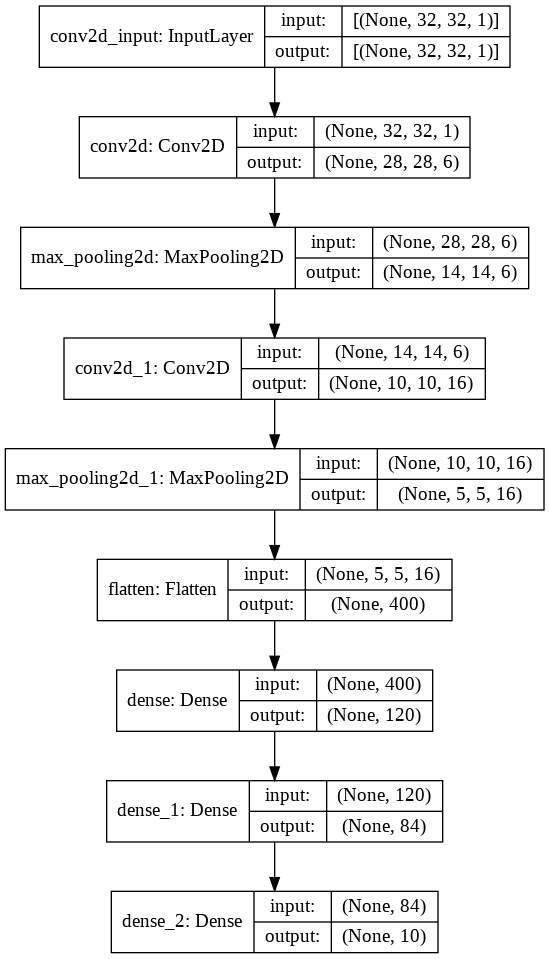

In [8]:
keras.utils.plot_model(model,show_shapes=True)

Train Model

In [9]:
model.fit(Xtrain,Ytrain,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 36s 3ms/step - loss: 0.4942
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1261
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0906
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0728
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0626
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0544
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0495
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0443
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0401
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0365
Epoch 11/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338
Epoch 12/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0310


Check Percent Rate 

In [10]:
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/len(Ztest)

0.9899

Dowload Mnist Thai

In [ ]:
!wget https://github.com/kittinan/thai-handwriting-number/blob/master/src/thainumber_28.pkl

Import Libary

In [11]:
import pickle 
import numpy as np 
import matplotlib.pyplot as plt 


Load Data

In [12]:
data = pickle.load(open('thainumber_28.pkl','rb'))
X = data['X']
Y = data['Y']

print(X.shape)
print(len(np.unique(Y)))

(1665, 28, 28, 1)
10


show data

In [ ]:
plt.imshow(X[0][:,:,0],cmap='gray')
plt.show()

Random Show

In [ ]:
n = 10 
for j,i in enumerate(np.random.choice(len(X), n)):
  plt.subplot(1,n,j+1)
  plt.imshow(X[i,:,:,0])
  plt.axis('off')
plt.show()

Resizes

In [15]:
from skimage.transform import resize

_X = []
for x in X:
  _X.append(resize(x,(32,32)))
X = np.array(_X)
del _X

Train Test Split

In [26]:
idx = np.random.permutation(np.arange(len(X)))
split = 1665*9 //10
train_idx = idx[:split]
test_idx = idx[split:]
Xtrain , Ytrain = X[train_idx] / 255. , Y[train_idx].astype(np.int)
Xtest  , Ytest = X[test_idx] / 255. , Y[test_idx].astype(np.int)

Model Mnist Predict Mnist Thai 

In [27]:
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/ len(Ztest)

0.9880239520958084

Train Lenet Mnist with Mnist Thai for Transfer learning 

In [22]:
model.fit(Xtrain,Ytrain,epochs=25)

Epoch 1/25
47/47 [==============================] - 0s 6ms/step - loss: 0.2818
Epoch 2/25
47/47 [==============================] - 0s 4ms/step - loss: 0.2005
Epoch 3/25
47/47 [==============================] - 0s 4ms/step - loss: 0.1527
Epoch 4/25
47/47 [==============================] - 0s 4ms/step - loss: 0.1164
Epoch 5/25
47/47 [==============================] - 0s 5ms/step - loss: 0.0985
Epoch 6/25
47/47 [==============================] - 0s 4ms/step - loss: 0.0783
Epoch 7/25
47/47 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 8/25
47/47 [==============================] - 0s 4ms/step - loss: 0.0592
Epoch 9/25
47/47 [==============================] - 0s 5ms/step - loss: 0.0530
Epoch 10/25
47/47 [==============================] - 0s 5ms/step - loss: 0.0501
Epoch 11/25
47/47 [==============================] - 0s 5ms/step - loss: 0.0435
Epoch 12/25
47/47 [==============================] - 0s 5ms/step - loss: 0.0417
Epoch 13/25
47/47 [==============================

Predict Transfer learning

In [28]:
Ztest = model.predict(Xtest)
np.sum(Ztest.argmax(axis=1) == Ytest)/ len(Ztest)

0.9880239520958084